In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Boosting & AdaBoost

AdaBoost means **Adaptive Boosting**, and has as a general procedure **the successive creation of the so-called weak learners**, which are very weak learning models - usually, **trees of a single node (stumps)**. It uses the **errors of the previous tree to improve the next tree**. The final predictions are made based on **the weights of each stump**, whose determination is part of the algorithm.

<img src="https://miro.medium.com/max/1744/1*nJ5VrsiS1yaOR77d4h8gyw.png" width=300>

Here, bootstrapping is not used: the method starts by training a weak classifier **in the original dataset**, and then trains several additional copies of the classifier **in the same dataset**, but giving **a greater weight to the observations that were misclassified** (or, in the case of regressions, observations **with the greatest error**). Then, after several iterations, classifiers/regressors will sequentially "focus on the most difficult cases", and build a chained classifier that is strong, despite using several weak classifiers as fundamental elements.

<img src="https://www.researchgate.net/profile/Zhuo_Wang8/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png" width=500>

In short, the main ideas behind this algorithm are:

- it creates and combines a set of **weak models** (usually, stumps)
- each stump is created **taking into account the errors of the previous stump**
- some of the stumps have **greater decision weight** than others in the final prediction

The classes in sklearn are:

- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Note that there are not many hyperparameters. The most important, which must be tuned with grid/random search, is:

- `n_estimators` : the number of chained weak learners

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
df = pd.read_csv("../data/german-credit-data.csv", index_col=0)
X = df.drop(columns="Risk")
y = df["Risk"]

pre_processor = pipe_pre_process_german(X, y)

pipe_ab = Pipeline([("pre_processor", pre_processor),
                    ("ab", AdaBoostClassifier(random_state=42))])

pipe_ab.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('ab', AdaBoostClassifier(random_state=42))])


Training evaluation metrics:


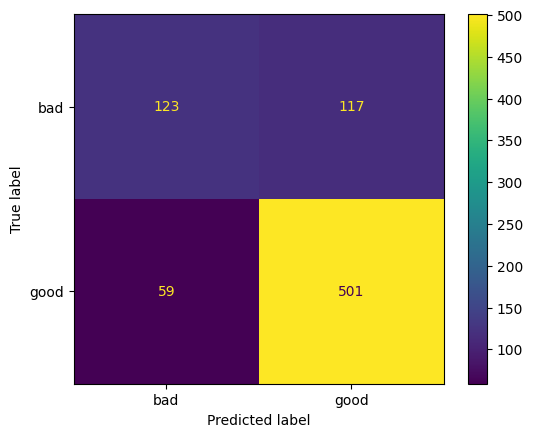

              precision    recall  f1-score   support

         bad       0.68      0.51      0.58       240
        good       0.81      0.89      0.85       560

    accuracy                           0.78       800
   macro avg       0.74      0.70      0.72       800
weighted avg       0.77      0.78      0.77       800


Test evaluation metrics:


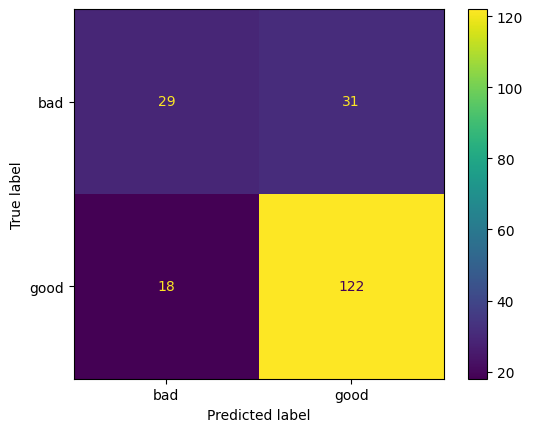

              precision    recall  f1-score   support

         bad       0.62      0.48      0.54        60
        good       0.80      0.87      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



In [10]:
classification_metrics(pipe_ab)


Training evaluation metrics:


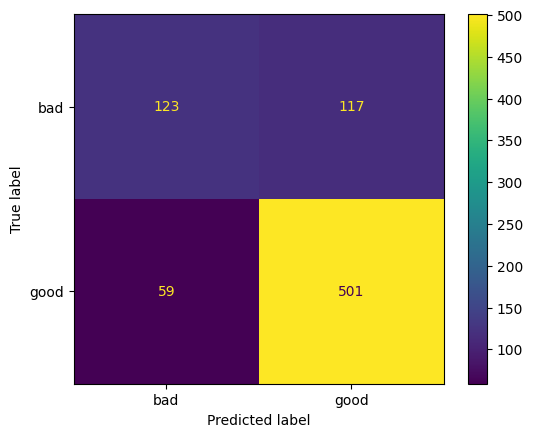

              precision    recall  f1-score   support

         bad       0.68      0.51      0.58       240
        good       0.81      0.89      0.85       560

    accuracy                           0.78       800
   macro avg       0.74      0.70      0.72       800
weighted avg       0.77      0.78      0.77       800


Test evaluation metrics:


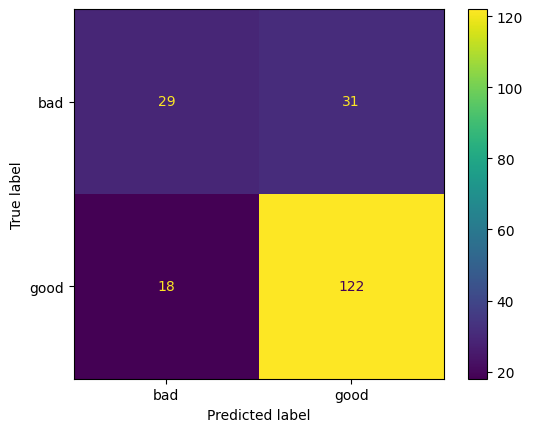

              precision    recall  f1-score   support

         bad       0.62      0.48      0.54        60
        good       0.80      0.87      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



In [11]:
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("../data/german-credit-data.csv", index_col=0)
X = df.drop(columns="Risk")
y = df["Risk"]

pre_processor = pipe_pre_process_german(X, y)

basal = DecisionTreeClassifier(max_depth=1)

pipe_ab = Pipeline([("pre_processor", pre_processor),
                    ("ab", AdaBoostClassifier(base_estimator=basal,
                                              random_state=42))])

pipe_ab.fit(X_train, y_train)

classification_metrics(pipe_ab)

In [12]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../data/german-credit-data.csv", index_col=0)
X = df.drop(columns="Risk")
y = df["Risk"]

pre_processor = pipe_pre_process_german(X, y)

basal = LogisticRegression(l1_ratio = 0.5, random_state=42)

pipe_ab = Pipeline([("pre_processor", pre_processor),
                    ("ab", AdaBoostClassifier(base_estimator=basal,
                                              random_state=42))])

params_grid_ab = {"ab__base_estimator__C" : [0.1, 0.01],
                  "ab__base_estimator__penalty" : ["l1", "l2", "elasticnet"],
                  "ab__n_estimators" : [50, 100, 150]} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_ab = GridSearchCV(estimator=pipe_ab,
                       param_grid=params_grid_ab,
                       scoring="f1_weighted",
                       cv=splitter,
                       n_jobs=-1)

grid_ab.fit(X_train, y_train)

/Users/marcosf/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marcosf/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marcosf/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marcosf/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marcosf/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elastic

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processor',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Duration']),
                                                                        ('transf_cat',
                                                                         Pipeline(steps=[('input_cat',
                                                                                          SimpleImputer(fill_value='unk...
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'Housing',
                                                                          'Saving '
                                                                          'accounts',
                                                                          'Checking '
                                                                          'account',
                                                                          'Purpose'])])),
                                       ('ab',
                                        AdaBoostClassifier(base_estimator=LogisticRegression(l1_ratio=0.5,
                                                                                             random_state=42),
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'ab__base_estimator__C': [0.1, 0.01],
                         'ab__base_estimator__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'ab__n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [13]:
grid_ab.best_estimator_

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('ab',
                 AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1,
                                                                      l1_ratio=0.5,
                                                                      random_state=42),
                                    n_estimators=150, random_state=42))])

In [14]:
grid_ab.best_params_

{'ab__base_estimator__C': 0.1,
 'ab__base_estimator__penalty': 'l2',
 'ab__n_estimators': 150}


Training evaluation metrics:


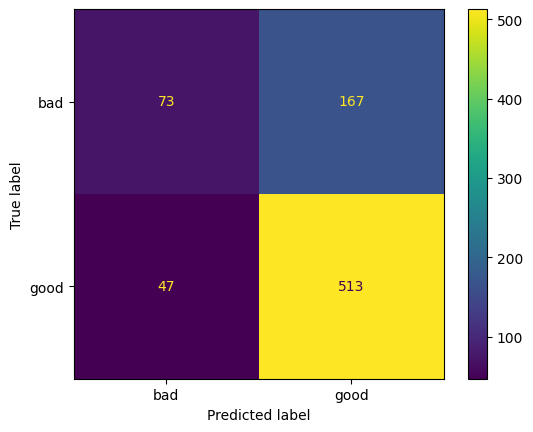

              precision    recall  f1-score   support

         bad       0.61      0.30      0.41       240
        good       0.75      0.92      0.83       560

    accuracy                           0.73       800
   macro avg       0.68      0.61      0.62       800
weighted avg       0.71      0.73      0.70       800


Test evaluation metrics:


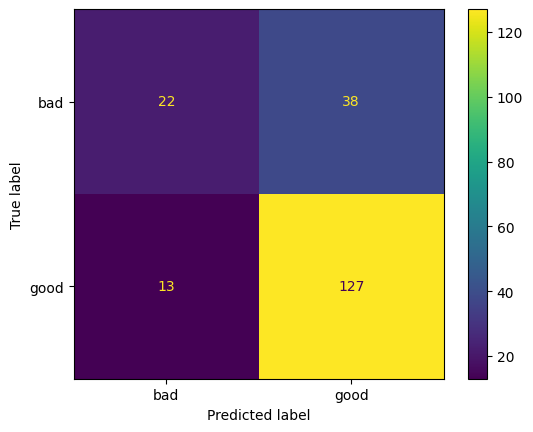

              precision    recall  f1-score   support

         bad       0.63      0.37      0.46        60
        good       0.77      0.91      0.83       140

    accuracy                           0.74       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.74      0.72       200



In [15]:
classification_metrics(grid_ab)

### Bagging vs Boosting

<img src=https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg width=600>

## Gradient boosting

It is also based on the principle of boosting (use of weak learners added in order to **sequentially minimize the errors committed**). But this method implements boosting through an explicit **gradient descent**. The idea is that we walk in the direction of **minimum error** iteratively **step by step**, the path being precisely given by the **gradient** of the **cost/loss function**, which measures the errors committed.

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif width=400>

It is of **great importance** in the study of neural networks and is, in general, the most commom optimization method. The general objective of the method is very simple: determine which are the **parameters** of the hypothesis that minimize the cost/loss function. For this, the method "walks" the error function, going towards its minimum, and this "path" made in the function is precisely given by the **iterative determination of the parameters**, that is, **at each step, we get closer to the final parameters of the hypothesis**, as they are adjusted to the data.

> **Brief mathematical interlude:** the gradient descent implemented by gradient boosting is, in fact, a **functional gradient descent**, that is, we want to find not a set of parameters that minimizes the error, but rather **sequentially introduce weak learners (simple hypothesis) that minimize the error**. In this way, gradient boosting minimizes the cost function by iteratively choosing simple hypotheses that point in the direction of the minimum, in this functional space.

For more details, check [this post](https://www.gormanalysis.com/blog/gradient-boosting-explained/) or [this site](https://explained.ai/gradient-boosting/), which contains several great materials to understand the method with all the mathematical details.

The sklearn classes are:

- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

The main hyperparameters to be adjusted are:

- `n_estimators` : number of chained weak learners
- `learning_rate` : constant that multiplies the gradient in the gradient descent. Essentially, it controls the "step size" to be taken towards the minimum

According to the [User Guide](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting): "*Empirical evidence suggests that small values of `learning_rate` favor better test error. The lireature recommends to set the learning rate to a small constant (e.g. `learning_rate <= 0.1`) and choose `n_estimators` by early stopping.*"

<img src=https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png width=700>


Training evaluation metrics:


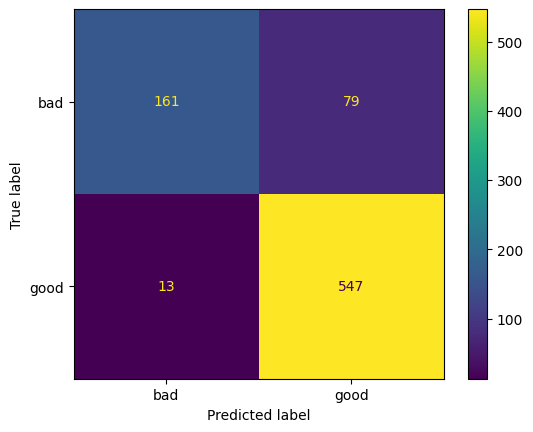

              precision    recall  f1-score   support

         bad       0.93      0.67      0.78       240
        good       0.87      0.98      0.92       560

    accuracy                           0.89       800
   macro avg       0.90      0.82      0.85       800
weighted avg       0.89      0.89      0.88       800


Test evaluation metrics:


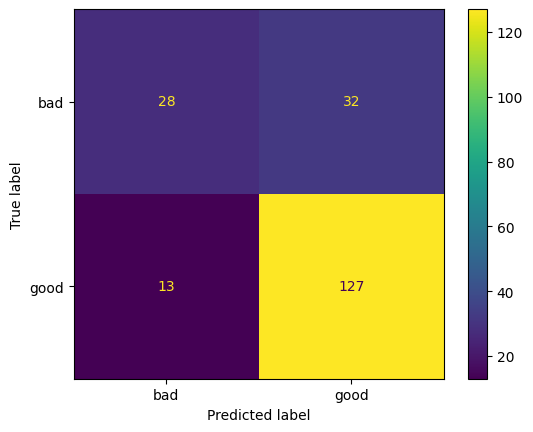

              precision    recall  f1-score   support

         bad       0.68      0.47      0.55        60
        good       0.80      0.91      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.69      0.70       200
weighted avg       0.76      0.78      0.76       200



In [16]:
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv("../data/german-credit-data.csv", index_col=0)
X = df.drop(columns="Risk")
y = df["Risk"]

pre_processor = pipe_pre_process_german(X, y)

pipe_gb = Pipeline([("pre_processor", pre_processor),
                    ("gb", GradientBoostingClassifier(random_state=42))])

pipe_gb.fit(X_train, y_train)

classification_metrics(pipe_gb)


Training evaluation metrics:


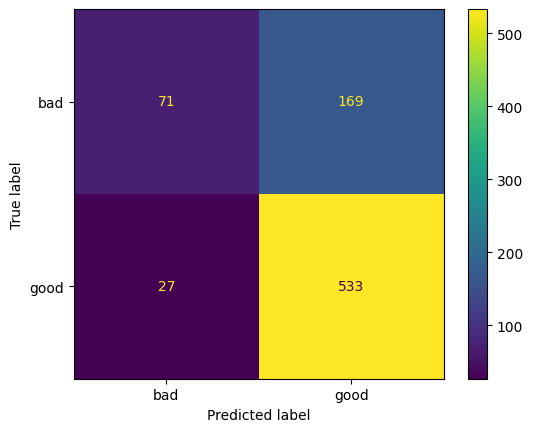

              precision    recall  f1-score   support

         bad       0.72      0.30      0.42       240
        good       0.76      0.95      0.84       560

    accuracy                           0.76       800
   macro avg       0.74      0.62      0.63       800
weighted avg       0.75      0.76      0.72       800


Test evaluation metrics:


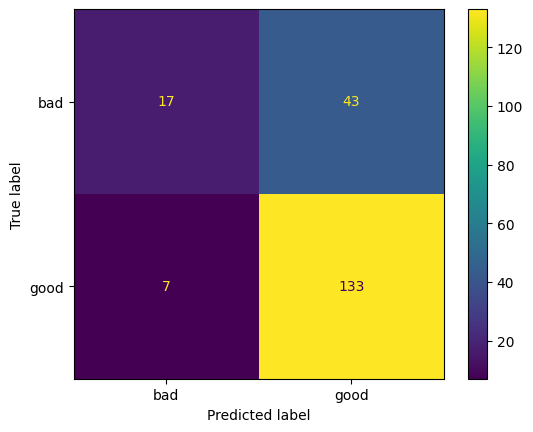

              precision    recall  f1-score   support

         bad       0.71      0.28      0.40        60
        good       0.76      0.95      0.84       140

    accuracy                           0.75       200
   macro avg       0.73      0.62      0.62       200
weighted avg       0.74      0.75      0.71       200



In [17]:
df = pd.read_csv("../data/german-credit-data.csv", index_col=0)
X = df.drop(columns="Risk")
y = df["Risk"]

pre_processor = pipe_pre_process_german(X, y)

pipe_gb = Pipeline([("pre_processor", pre_processor),
                    ("gb", GradientBoostingClassifier(max_depth=1,
                                                      random_state=42))])

pipe_gb.fit(X_train, y_train)

classification_metrics(pipe_gb)

## XGBoost (e**X**treme **G**radient **Boost**ing)

This method is nothing more than a gradient boosting, but with some important modifications that give it the title of "extreme". In particular, two changes deserve attention:

- addition of regularization procedures (L1 and L2), which considerably improves its generalization capacity

- use of second order derivatives (Hessian) for the gradient procedure. This is a more advanced technique, which allows the method to "take bigger steps" towards the minimum, and thus converge faster

Some recommended readings:

- [This](https://shirinsplayground.netlify.app/2018/11/ml_basics_gbm/) explains the particularities of XGBoost, in addition to giving a good introduction to gradient boosting

- [This](https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb) introduces the method well, while emphasizing its particularities, with some mathematical details

- [This](https://xgboost.readthedocs.io/en/latest/tutorials/model.html), from the library's own documentation, brings a nice explanation, and with some mathematical details;

- [This](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d) presents a high level discussion (without so many details) about XGBoost and the reasons for its success

In [19]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../data/german-credit-data.csv", index_col=0)
X = df.drop(columns="Risk")
y = df["Risk"]

le = LabelEncoder()
y_train = le.fit_transform(y_train)

pre_processor = pipe_pre_process_german(X, y)
pipe_xgb = Pipeline([("pre_processor", pre_processor),
                     ("xgb", XGBClassifier(eval_metric='logloss', random_state=42))])

pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving acco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])


Training evaluation metrics:


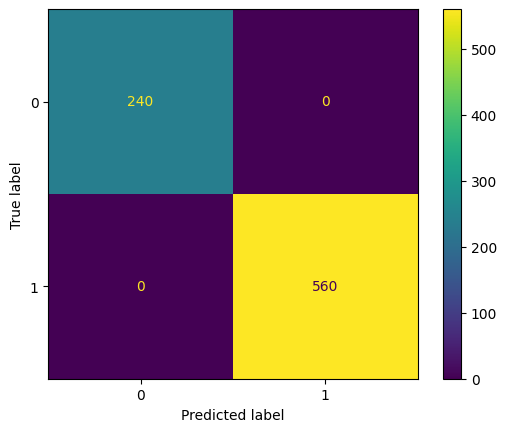

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       560

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test evaluation metrics:


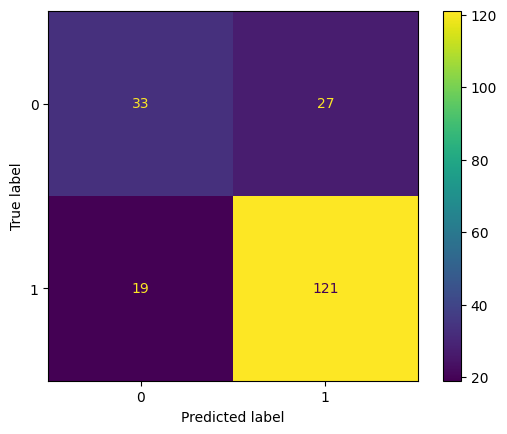

              precision    recall  f1-score   support

           0       0.63      0.55      0.59        60
           1       0.82      0.86      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.76      0.77      0.76       200



In [20]:
print("\nTraining evaluation metrics:")
y_pred_train = pipe_xgb.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

le = LabelEncoder()
y_test = le.fit_transform(y_test)

print("\nTest evaluation metrics:")
y_pred_test = pipe_xgb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))